# **Importing Libraries**

In [ ]:

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy import stats
## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will **subscribe a term deposit (variable y).**
https://archive.ics.uci.edu/dataset/222/bank+marketing

Q1. what do customer has y (	has the client subscribed a term deposit?) have in common? Did they get contacted? education level? balance? any default credit? marital status ( single tend to not have term deposit?) any loan with us?

Q2.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Downloading data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Data set/bank-full.csv', sep=';', header=0)


#***Data Exploration***

In [ ]:
print(df.shape) #print data shape
df.head(5)  # To show first 5 rows of the data set

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.describe(include= 'all').T #Give statistical information about the data set such as mean ,median ,mode,max value,min value

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


Data inputs

1.age (Integer)


2.job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)

3.marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4.education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)

5.default: has credit in default? (categorical: “no”, “yes”)

6.balance: average yearly balance

7.housing: has housing loan? (categorical: “no”, “yes”)

8.loan: has personal loan? (categorical: “no”, “yes”)

9.contact: contact communication type (categorical: “cellular”, “telephone”)
day: last contact day ( 1-31)

10.month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14.previous: number of contacts performed before this campaign and for this client (numeric)

15.poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)

16.y: has the client subscribed a term deposit? ( yes, no)


# Data Dictionary

| **Variable**   | **Definition**                                         | **Key** |
|----------------|--------------------------------------------------------|----------------------------------------------------------|
| **age**        | Age of the client                                       | *Integer* |
| **job**        | Type of job                                             | *admin*, *blue-collar*, *entrepreneur*, *housemaid*, *management*, *retired*, *self-employed*, *services*, *student*, *technician*, *unemployed*, *unknown* |
| **marital**    | Marital status                                          | *divorced*, *married*, *single*, *unknown* |
| **education**  | Level of education                                      | *basic.4y*, *basic.6y*, *basic.9y*, *high.school*, *illiterate*, *professional.course*, *university.degree*, *unknown* |
| **default**    | Has credit in default?                                  | *no*, *yes* |
| **balance**    | Average yearly balance                                  | *Numeric* |
| **housing**    | Has housing loan?                                       | *no*, *yes* |
| **loan**       | Has personal loan?                                      | *no*, *yes* |
| **contact**    | Contact communication type                              | *cellular*, *telephone* |
| **day**        | Last contact day                                        | *1-31* (*Numeric*) |
| **month**      | Last contact month of the year                          | *jan*, *feb*, *mar*, *apr*, *may*, *jun*, *jul*, *aug*, *sep*, *oct*, *nov*, *dec* |
| **duration**   | Last contact duration in seconds                        | *Numeric* (*should be discarded for predictive modeling*) |
| **campaign**   | Number of contacts performed during this campaign       | *Numeric* |
| **pdays**      | Number of days since last contact from previous campaign | *999* means not previously contacted |
| **previous**   | Number of contacts performed before this campaign       | *Numeric* |
| **poutcome**   | Outcome of the previous marketing campaign              | *failure*, *nonexistent*, *success* |
| **y**          | Has the client subscribed to a term deposit?            | *yes*, *no* |



In [ ]:
df.duplicated().sum() #To check duplicate values

0

In [ ]:
df[df.balance<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [ ]:
round(len(df[df.balance<0])/len(df)*100,2) # 8.3% of the accounts has negative balance with Max is -8019.0 => How did this happen? Does this include Credit Products Balance such as home loan, credit card, overdraft?


8.33

In [ ]:
df.isnull().sum() #To check is their any null values in the features of the data set

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.info() # Checking for dataset structure, data types, and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:

# Summarizing the unique values in each column to identify outliers by comparing with data dictionary.
df.nunique()



,0
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


In [ ]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

<ipython-input-174-7c51ff6ce054>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["y"], palette="coolwarm")


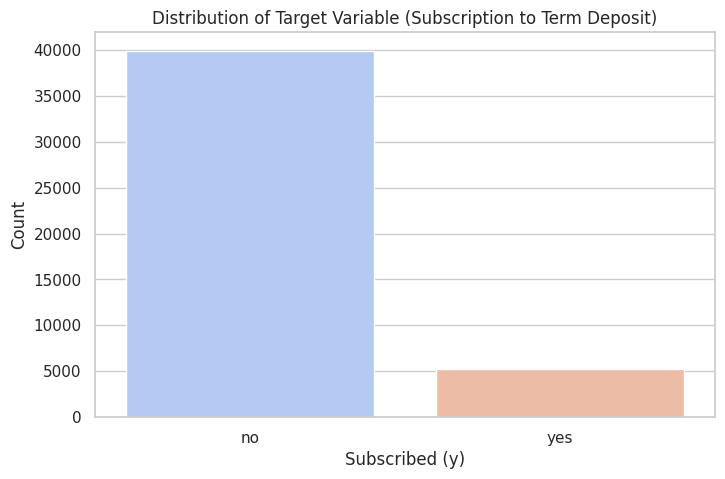

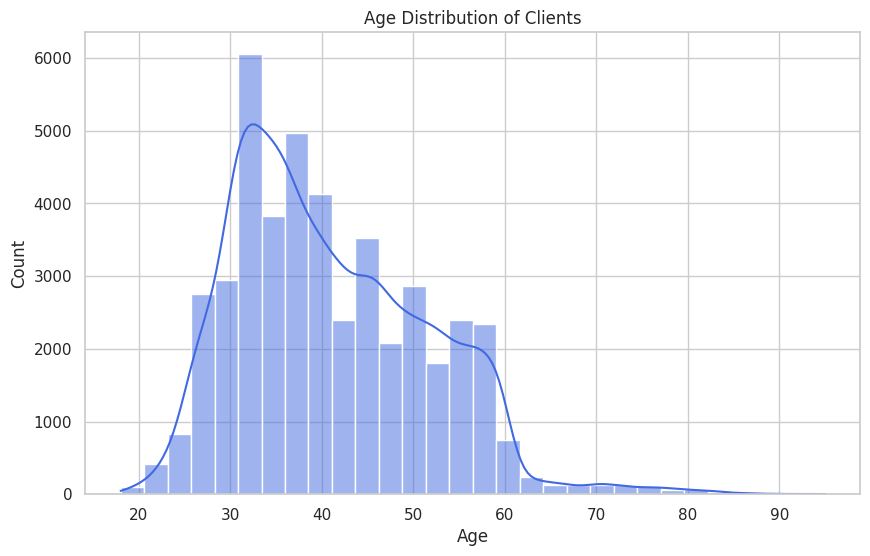

<ipython-input-174-7c51ff6ce054>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["y"], y=df["balance"], palette="coolwarm")


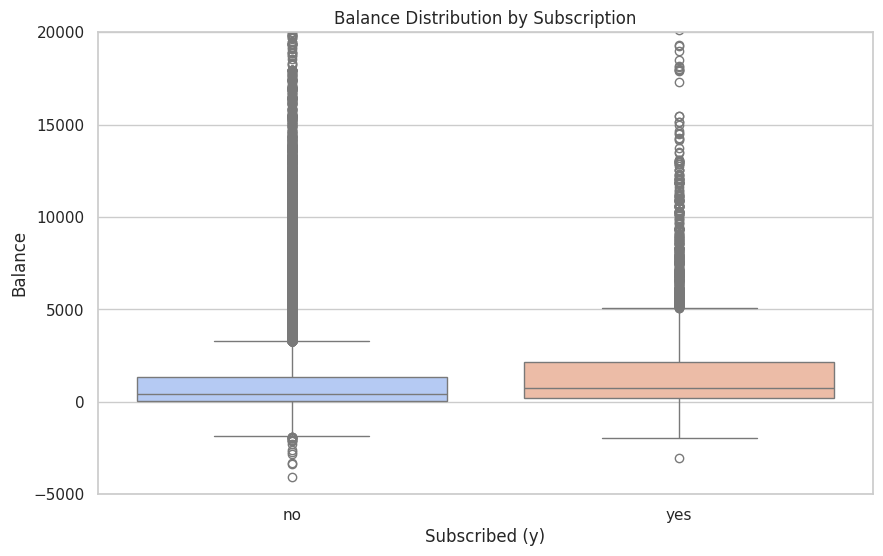

In [ ]:
# Set aesthetic style for plots
sns.set_theme(style="whitegrid")

# Visualization 1: Distribution of Target Variable 'y'
plt.figure(figsize=(8, 5))
sns.countplot(x=df["y"], palette="coolwarm")
plt.title("Distribution of Target Variable (Subscription to Term Deposit)")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.show()

# Visualization 2: Age Distribution of Clients
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=30, kde=True, color="royalblue")
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Visualization 3: Balance Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["y"], y=df["balance"], palette="coolwarm")
plt.title("Balance Distribution by Subscription")
plt.xlabel("Subscribed (y)")
plt.ylabel("Balance")
plt.ylim(-5000, 20000)  # Limiting to exclude extreme outliers for clarity
plt.show()

In [ ]:
df[df.y=='yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [ ]:
# Replace 'yes' with 1 and 'no' with 0 in the 'y' column
df['Subcribed'] = df['y'].replace({'yes': 1, 'no': 0})





<ipython-input-122-c356ffe1d8a2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subcribed'] = df['y'].replace({'yes': 1, 'no': 0})


In [ ]:
df.corr(numeric_only=True)['Subcribed'].sort_values() #Find correlation between y and other features.

,Subcribed
campaign,-0.073172
day,-0.028348
age,0.025155
balance,0.052838
previous,0.093236
pdays,0.103621
duration,0.394521
Subcribed,1.000000


* Correlation is not causation so its best to perform t-test and chi-square test as we have both numerical and categorical features/variables in this data set.
* These tests help understand feature importance based on significance.





# **T-Test**

In [ ]:
#T-test for numerical features
df_columns = df.columns.difference(['duration', 'Subcribed']) #take out these features as explained in the data dictionary above
alpha = 0.05
significant_features=[]
for column in df_columns:
  if df[column].dtype == 'int64':  # only use features with integer data type
    a= df[df.y == 'yes'][column].sample(300, random_state=42) #sample size 1% of the dataset. Setting a fixed random seed ensures that the results of random processes (e.g., splitting data, initializing weights, or shuffling) are reproducible. This is crucial for debugging, peer review, sharing code, and ensuring that experiments can be replicated.
    b= df[df.y == 'no'][column].sample(300, random_state=42) #The number 42 is a humorous reference to "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where 42 is famously presented as the "Answer to the Ultimate Question of Life, the Universe, and Everything." This has made it a playful and memorable choice for a default random seed.

#H0 no difference between a and b
#H1 there's difference between a and b
    t_stat, p_value = stats.ttest_ind(a, b, equal_var=False) #not to assume that the two samples have equal variances.

    if p_value < alpha: #only return significant features
         significant_features.append(column)
         print(f"Column: {column}")
         print(f"T-test: {t_stat}, P-value: {p_value}")
         print("Result: Reject the null hypothesis (H0). There's a significant difference.\n")



Column: balance
T-test: 2.405725588001907, P-value: 0.01645427699690757
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: campaign
T-test: -4.001929531308218, P-value: 7.307797701444922e-05
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: pdays
T-test: 4.510664199973555, P-value: 7.913833416896575e-06
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: previous
T-test: 3.226049099924542, P-value: 0.0013357739043899936
Result: Reject the null hypothesis (H0). There's a significant difference.



# **Chi-Square Test**





In [ ]:
#chi-square test for categorical features/variables
from scipy.stats import chi2_contingency
df_columns = df.columns.difference(['y'])
alpha = 0.05
for column in df_columns:
  if df[column].dtype == 'object':
    contingency_table = pd.crosstab(df['y'], df[column])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

#H0 no diff btw a and b
#H1 there's diff btw a and b

    if p_value < alpha:
       significant_features.append(column)
       print(f"Column: {column}")
       print(f"Chi-Square Statistic:{chi2},P-Value:{p_value},Degrees of Freedom:{dof}")
       print("Result: Reject the null hypothesis (H0). There's a significant difference.\n")


Column: contact
Chi-Square Statistic:1035.7142253562922,P-Value:1.251738325340495e-225,Degrees of Freedom:2
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: default
Chi-Square Statistic:22.20224995571685,P-Value:2.4538606753508344e-06,Degrees of Freedom:1
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: education
Chi-Square Statistic:238.92350616407606,P-Value:1.6266562124072994e-51,Degrees of Freedom:3
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: housing
Chi-Square Statistic:874.822448867983,P-Value:2.918797605076633e-192,Degrees of Freedom:1
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: job
Chi-Square Statistic:836.1054877471965,P-Value:3.337121944935502e-172,Degrees of Freedom:11
Result: Reject the null hypothesis (H0). There's a significant difference.

Column: loan
Chi-Square Statistic:209.61698034978633,P-Value:1.665061163492756e-47,De

In [ ]:
print( significant_features)

['balance', 'campaign', 'pdays', 'previous', 'contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']


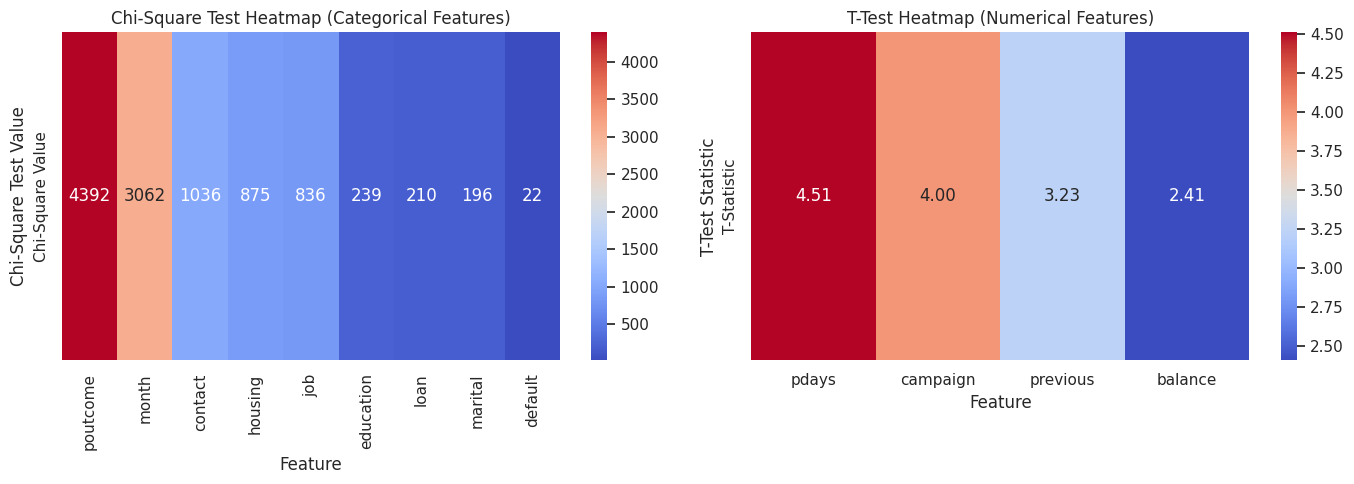

In [ ]:
# --- Chi-Square Test for Categorical Features ---
categorical_features = ['contact', 'default', 'education', 'housing', 'job', 'loan', 'marital', 'month', 'poutcome']
chi2_values = []
p_values_chi2 = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df["y"], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values_chi2.append(p)

# Create a DataFrame for the Chi-Square heatmap
chi2_df = pd.DataFrame({"Feature": categorical_features, "Chi-Square Value": chi2_values})
chi2_df = chi2_df.set_index("Feature").sort_values(by="Chi-Square Value", ascending=False)

# --- T-Test for Numerical Features ---
numerical_features = ['balance', 'campaign', 'pdays', 'previous']
t_values = []
p_values_ttest = []

alpha = 0.05

for feature in numerical_features:
    group_yes = df[df.y == 'yes'][feature].sample(300, random_state=42)
    group_no = df[df.y == 'no'][feature].sample(300, random_state=42)

    t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=False)
    t_values.append(abs(t_stat))  # Taking absolute values for consistency
    p_values_ttest.append(p_value)

# Create a DataFrame for the T-Test heatmap
ttest_df = pd.DataFrame({"Feature": numerical_features, "T-Statistic": t_values})
ttest_df = ttest_df.set_index("Feature").sort_values(by="T-Statistic", ascending=False)

# --- Plot the heatmaps ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chi-Square Heatmap
sns.heatmap(chi2_df.T, cmap="coolwarm", annot=True, fmt=".0f", ax=axes[0])
axes[0].set_title("Chi-Square Test Heatmap (Categorical Features)")
axes[0].set_xlabel("Feature")
axes[0].set_ylabel("Chi-Square Test Value")

# T-Test Heatmap
sns.heatmap(ttest_df.T, cmap="coolwarm", annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("T-Test Heatmap (Numerical Features)")
axes[1].set_xlabel("Feature")
axes[1].set_ylabel("T-Test Statistic")

plt.tight_layout()
plt.show()

In [ ]:
df[[col for col in significant_features if col in df.columns]].describe(include= 'all')


,balance,campaign,pdays,previous,contact,default,education,housing,job,loan,marital,month,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,NaN,NaN,NaN,NaN,3,2,4,2,12,2,3,12,4
top,NaN,NaN,NaN,NaN,cellular,no,secondary,yes,blue-collar,no,married,may,unknown
freq,NaN,NaN,NaN,NaN,29285,44396,23202,25130,9732,37967,27214,13766,36959
mean,1362.272058,2.763841,40.197828,0.580323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3044.765829,3.098021,100.128746,2.303441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-8019.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,72.000000,1.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,448.000000,2.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1428.000000,3.000000,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[[col for col in significant_features if col in df.columns] + ['y']]
df

,balance,campaign,pdays,previous,contact,default,education,housing,job,loan,marital,month,poutcome,y
0,2143,1,-1,0,unknown,no,tertiary,yes,management,no,married,may,unknown,no
1,29,1,-1,0,unknown,no,secondary,yes,technician,no,single,may,unknown,no
2,2,1,-1,0,unknown,no,secondary,yes,entrepreneur,yes,married,may,unknown,no
3,1506,1,-1,0,unknown,no,unknown,yes,blue-collar,no,married,may,unknown,no
4,1,1,-1,0,unknown,no,unknown,no,unknown,no,single,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,3,-1,0,cellular,no,tertiary,no,technician,no,married,nov,unknown,yes
45207,1729,2,-1,0,cellular,no,primary,no,retired,no,divorced,nov,unknown,yes
45208,5715,5,184,3,cellular,no,secondary,no,retired,no,married,nov,success,yes
45209,668,4,-1,0,telephone,no,secondary,no,blue-collar,no,married,nov,unknown,no


#Train models for prediction






In [ ]:
# Convert 'y' to binary (yes = 1, no = 0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables (convert categorical features into numerical values for modeling)
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
df_encoded

,balance,campaign,pdays,previous,y,contact_telephone,contact_unknown,default_yes,education_secondary,education_tertiary,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,-1,0,0,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,29,1,-1,0,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,2,1,-1,0,0,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,1506,1,-1,0,0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,1,1,-1,0,0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,3,-1,0,1,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
45207,1729,2,-1,0,1,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
45208,5715,5,184,3,1,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
45209,668,4,-1,0,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [ ]:

# Prepare data for modeling (excluding 'duration' as per best practices to avoid leakage)
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

In [ ]:
# Scale features (standardizing data improves model performance and ensures equal weighting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Forward Feature Selection for Ridge Regression using Logistic Regression
ridge_base = LogisticRegression(solver='liblinear', max_iter=500)
sfs = SequentialFeatureSelector(ridge_base, direction='forward', n_features_to_select=10)
sfs.fit(X_scaled, y)
selected_features = X.columns[sfs.get_support()]
X_selected = X[selected_features]
X_scaled_selected = scaler.fit_transform(X_selected)

In [ ]:
selected_features

Index(['contact_telephone', 'default_yes', 'education_secondary',
       'education_tertiary', 'job_entrepreneur', 'job_self-employed',
       'job_unemployed', 'job_unknown', 'poutcome_other', 'poutcome_success'],
      dtype='object')

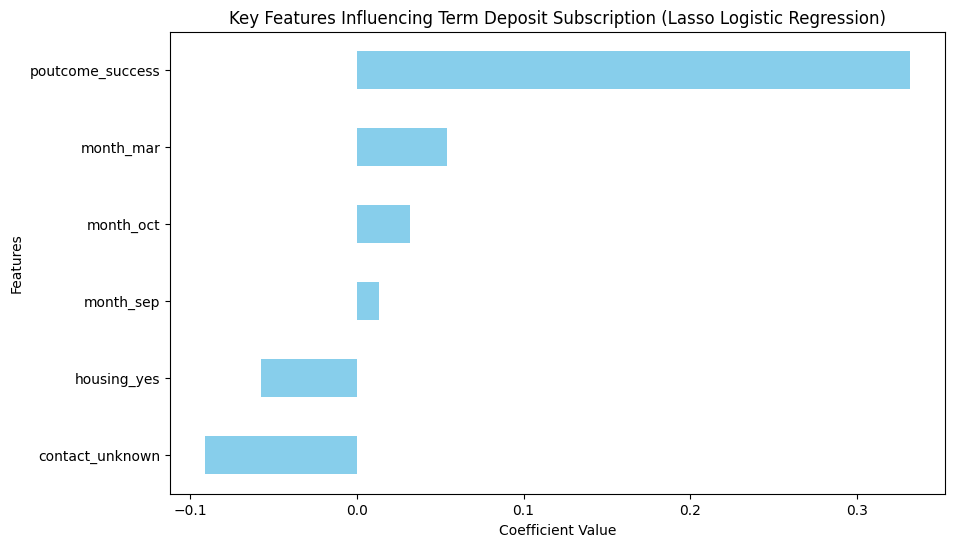

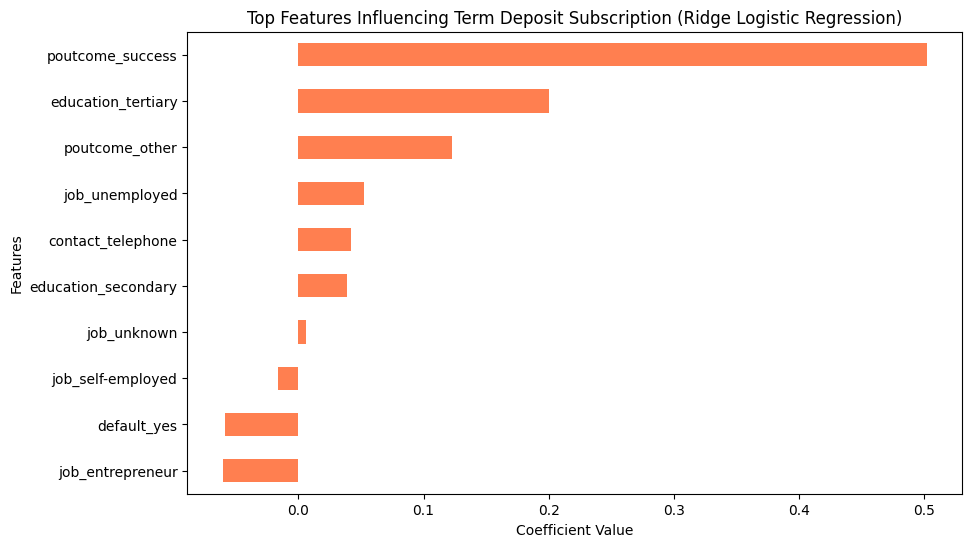

Lasso Logistic Regression Accuracy: 89.31%
Ridge Logistic Regression Accuracy: 89.29%


In [ ]:
# Train Lasso Logistic Regression (L1 regularization selects important features)
lasso_log_reg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', scoring='accuracy', max_iter=1000, random_state=42)
lasso_log_reg.fit(X_scaled, y)

# Train Ridge Logistic Regression (L2 regularization reduces overfitting) on selected features
ridge_log_reg = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', scoring='accuracy', max_iter=1000, random_state=42)
ridge_log_reg.fit(X_scaled_selected, y)

# Extract coefficients from Lasso model (only important features remain)
coef_lasso = pd.Series(lasso_log_reg.coef_[0], index=X.columns)
selected_features_lasso = coef_lasso[coef_lasso != 0].sort_values(ascending=False)

# Visualize Lasso selected features
plt.figure(figsize=(10, 6))
selected_features_lasso.plot(kind='barh', color='skyblue')
plt.title('Key Features Influencing Term Deposit Subscription (Lasso Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Extract coefficients from Ridge model (all features have non-zero values)
coef_ridge = pd.Series(ridge_log_reg.coef_[0], index=X_selected.columns).sort_values(ascending=False)

# Visualize Ridge top features
plt.figure(figsize=(10, 6))
coef_ridge.head(10).plot(kind='barh', color='coral')
plt.title('Top Features Influencing Term Deposit Subscription (Ridge Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

# Evaluate model accuracy
lasso_score = lasso_log_reg.score(X_scaled, y)
ridge_score = ridge_log_reg.score(X_scaled_selected, y)

print(f"Lasso Logistic Regression Accuracy: {lasso_score * 100:.2f}%")
print(f"Ridge Logistic Regression Accuracy: {ridge_score * 100:.2f}%")


In [ ]:
coef_ridge

,0
poutcome_success,0.502069
education_tertiary,0.200307
poutcome_other,0.122351
job_unemployed,0.052552
contact_telephone,0.042095
education_secondary,0.038543
job_unknown,0.006448
job_self-employed,-0.016181
default_yes,-0.058629
job_entrepreneur,-0.060605


In [ ]:
selected_features_lasso

,0
poutcome_success,0.331602
month_mar,0.053923
month_oct,0.031570
month_sep,0.012981
housing_yes,-0.057719
contact_unknown,-0.091032


In [ ]:
# Adjust Lasso-selected customer criteria based on updated feature importance
lasso_criteria = (
    (df_encoded['poutcome_success'] == 1) &
    ((df_encoded['month_mar'] == 1) | (df_encoded['month_oct'] == 1) | (df_encoded['month_sep'] == 1)) &
    (df_encoded['housing_yes'] == 0) &  # Customers without a housing loan
    (df_encoded['contact_unknown'] == 0)  # Customers with known contact method
)

# Adjust Ridge-selected customer criteria based on updated feature importance
ridge_criteria = (
    (df_encoded['poutcome_success'] == 1) &
    ((df_encoded['month_mar'] == 1) | (df_encoded['month_oct'] == 1) | (df_encoded['month_sep'] == 1) | (df_encoded['month_dec'] == 1)) &
    ((df_encoded['education_tertiary'] == 1) |  # Higher education is a strong predictor
     (df_encoded['poutcome_other'] == 1) |  # Previous outcome had some success
     (df_encoded['job_unemployed'] == 1)) &  # Unemployed customers showed interest
    (df_encoded['contact_telephone'] == 1)  # Contacted via telephone
)

# Calculate potential target customer sizes
lasso_target_size = df_encoded[lasso_criteria].shape[0]
ridge_target_size = df_encoded[ridge_criteria].shape[0]

print(f"Potential Target Size (Lasso): {lasso_target_size}")
print(f"Potential Target Size (Ridge): {ridge_target_size}")




Potential Target Size (Lasso): 248
Potential Target Size (Ridge): 5


In [ ]:
# Rank features by absolute value and pick the top 3 from both Lasso and Ridge
key_features = (
    list(selected_features_lasso.abs().sort_values(ascending=False).head(3).index) +
    list(coef_ridge.abs().sort_values(ascending=False).head(3).index)
)

# Remove duplicates while preserving order
key_features = list(dict.fromkeys(key_features))

# Display final selected features
key_features

['poutcome_success',
 'contact_unknown',
 'housing_yes',
 'education_tertiary',
 'poutcome_other']

In [ ]:
# Visualizing subscription distribution across key features
key_features = list(selected_features_lasso.head(4).index) + list(coef_ridge.head(4).index)
key_features = list(set(key_features))  # Remove duplicates

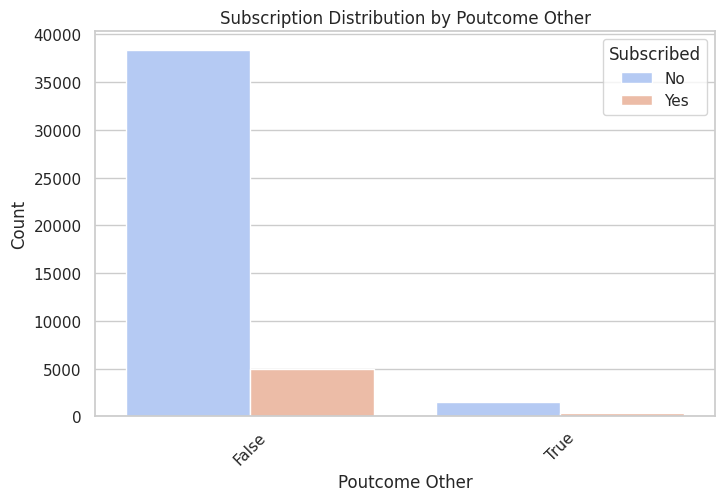

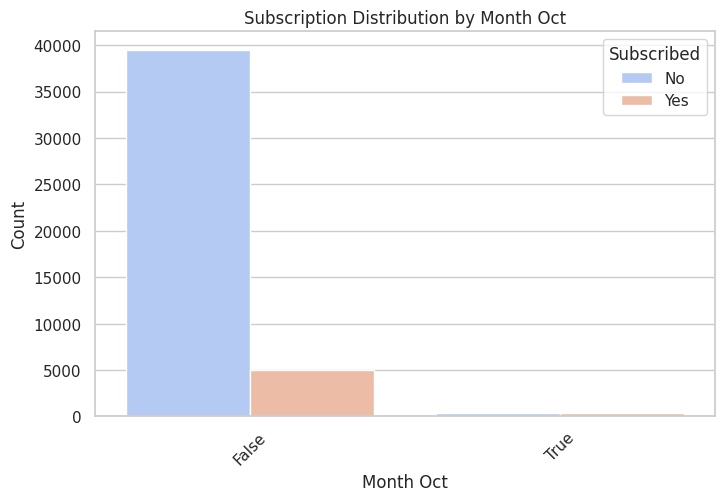

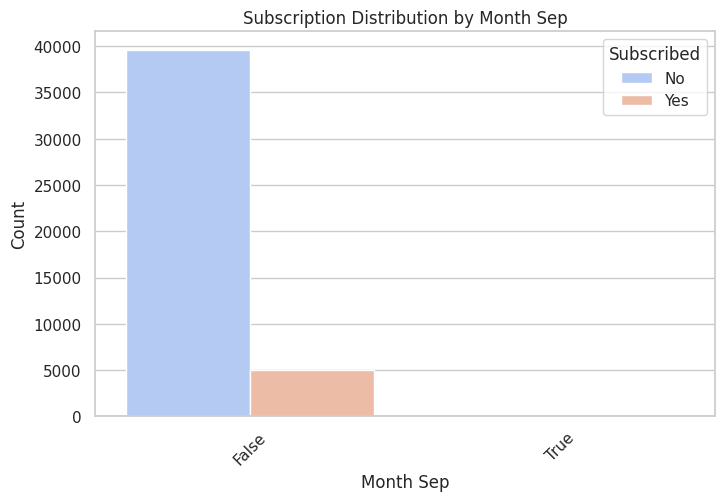

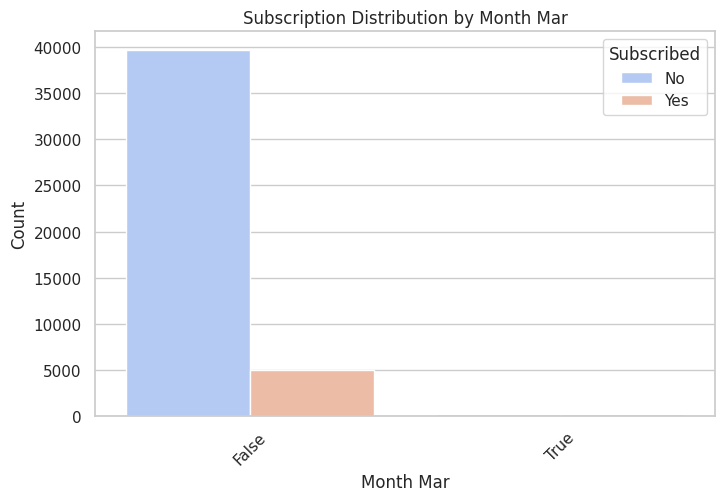

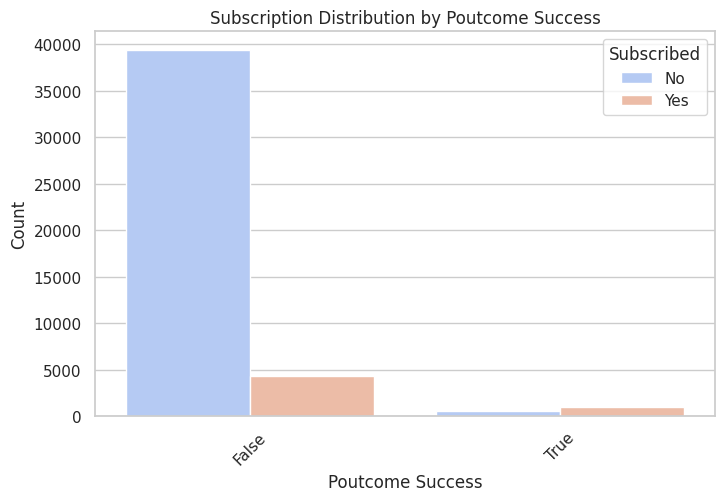

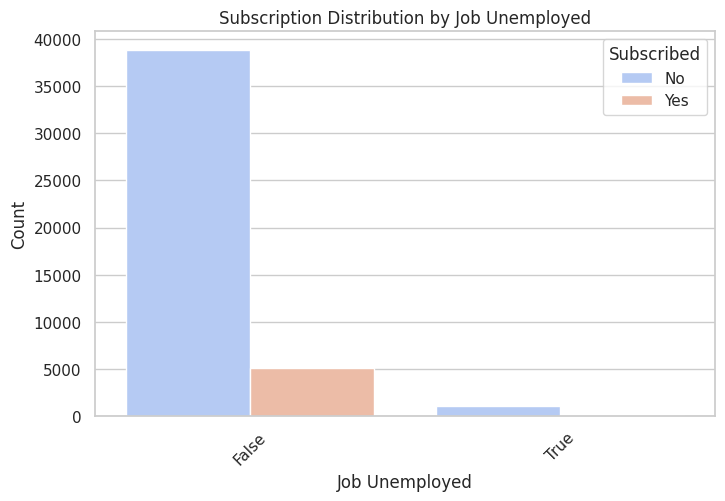

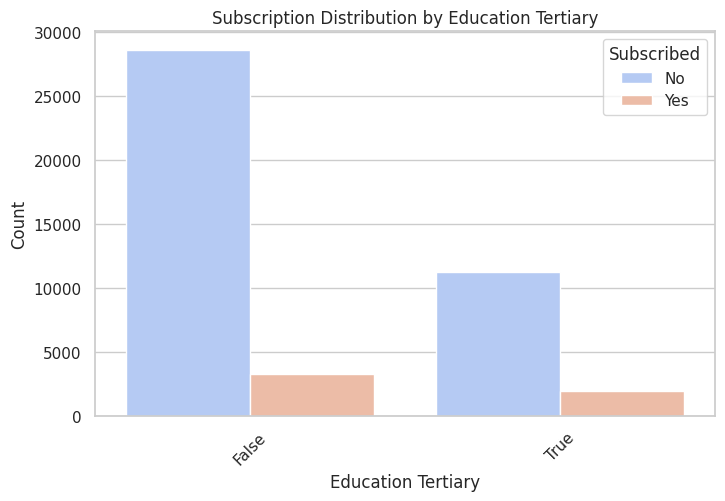

In [ ]:


# Generate visualizations for valid features
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_encoded, x=feature, hue=y, palette="coolwarm")
    plt.title(f'Subscription Distribution by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel("Count")
    plt.legend(title="Subscribed", labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.show()


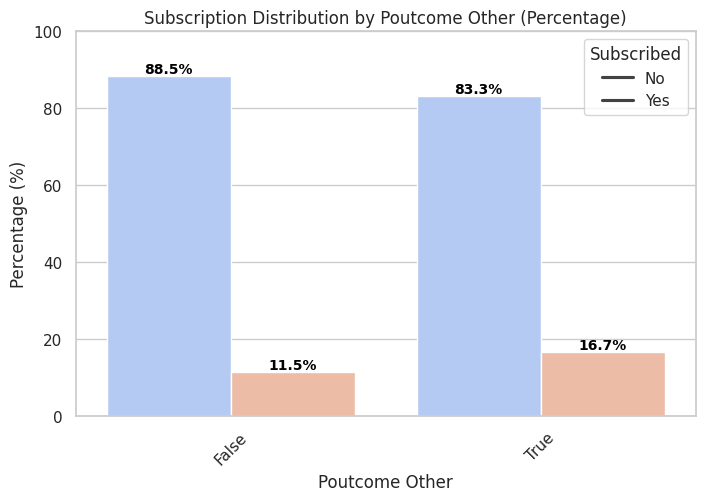

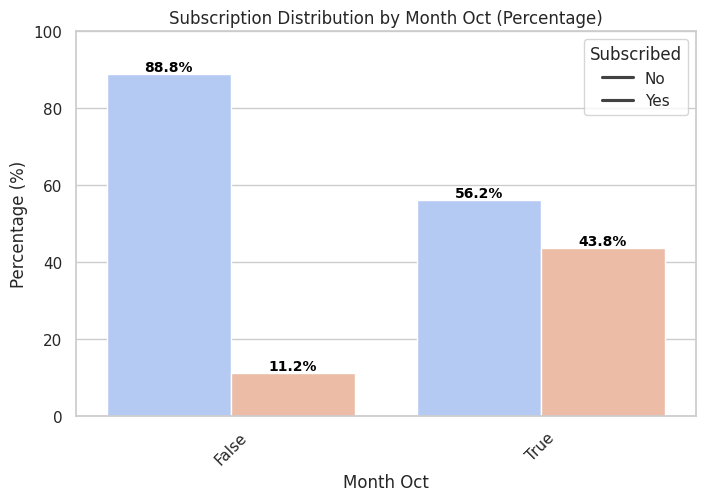

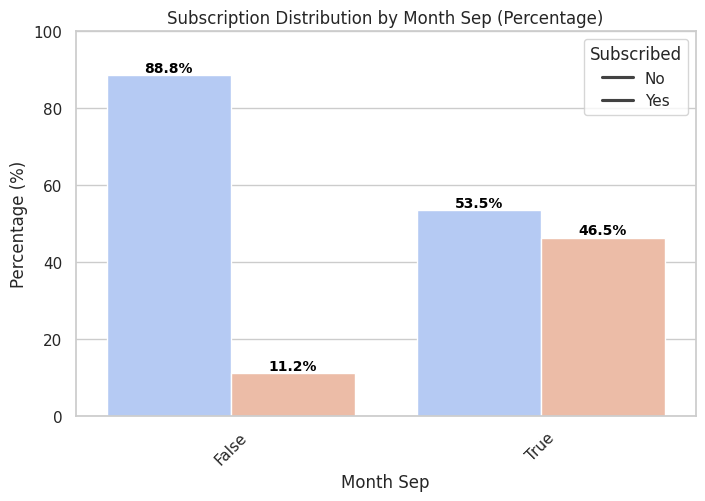

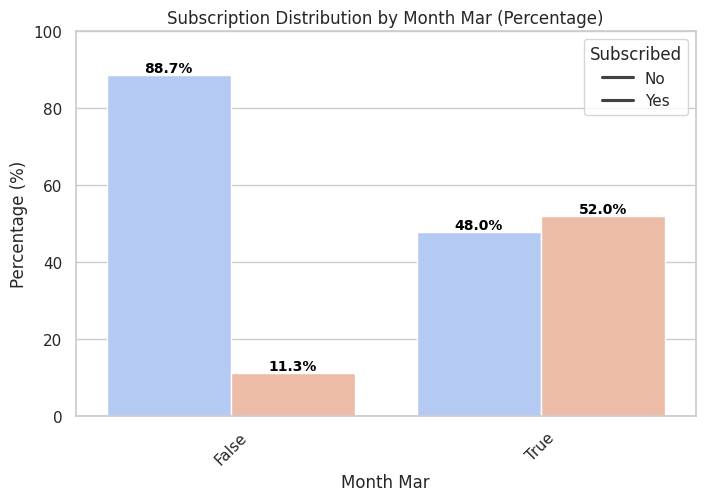

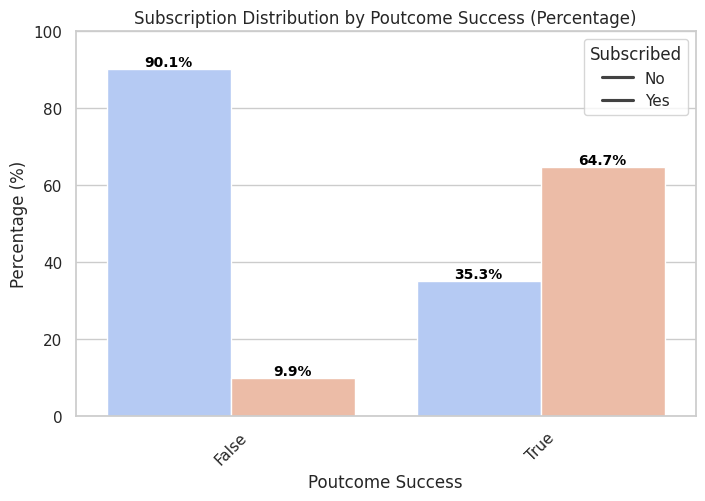

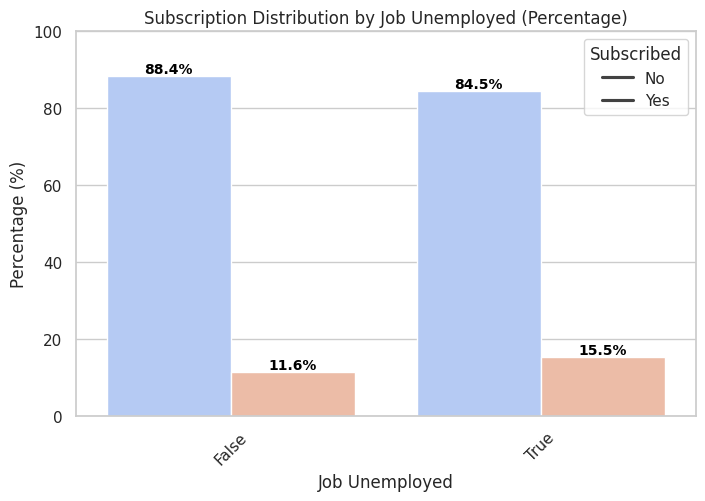

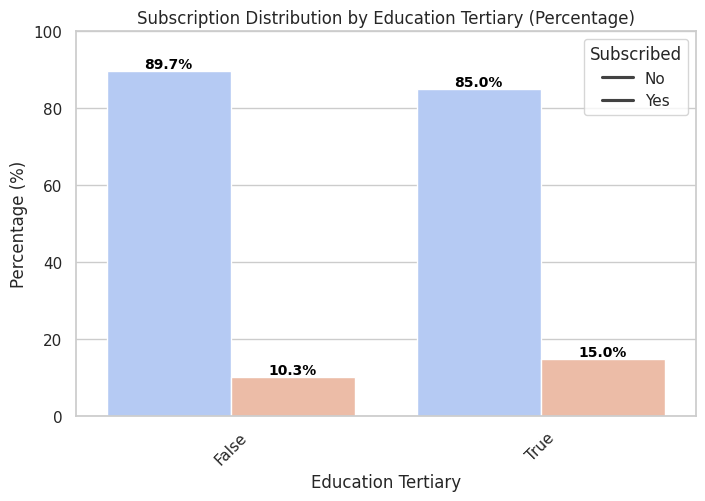

In [ ]:
# Adjusted visualization: Adding percentage labels to bars
for feature in key_features:
    if feature in df_encoded.columns:
        # Calculate percentage distribution
        feature_counts = df_encoded.groupby(feature)["y"].value_counts(normalize=True).mul(100).rename("Percentage").reset_index()

        # Create percentage bar plot
        plt.figure(figsize=(8, 5))
        ax = sns.barplot(data=feature_counts, x=feature, y="Percentage", hue="y", palette="coolwarm")

        # Add percentage labels to bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Avoid placing labels on bars with zero height
                ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

        # Formatting the plot
        plt.title(f'Subscription Distribution by {feature.replace("_", " ").title()} (Percentage)')
        plt.xlabel(feature.replace("_", " ").title())
        plt.ylabel("Percentage (%)")
        plt.legend(title="Subscribed", labels=["No", "Yes"])
        plt.xticks(rotation=45)
        plt.ylim(0, 100)  # Ensure the y-axis represents a percentage scale

        # Show the plot
        plt.show()